# MVP Análise de Dados e Boas Práticas

**Nome:** Kaio Santos de Farias

**Matrícula:** 4052025000452

**Dataset:** [Sao Paulo Housing Prices](https://www.kaggle.com/datasets/renatosn/sao-paulo-housing-prices)

# Descrição do Problema

O dataset selecionado contém informações extraídas a partir de web-scrapping do site Quinto Andar, uma plataforma de pesquisa e aluguel de imóveis amplamente utilizada na cidade de São Paulo. Todos os dados foram extraídos em 1 de maio de 2023, e consolidam informações técnicas sobre características e valores dos imóveis disponíveis na cidade são Paulo.

Minha hipótese geral é de que, a partir dos dados documentados é possível identificar fatores críticos que impactam no preço dos imóveis (como número de cômodos e localização), e tem como plano de fundo também o objetivo de treinar um modelo de regressão linear que ajude a prever os valores de imóveis a partir da base disponível.

## Hipóteses do Problema

As hipóteses que tracei são as seguintes:

- O número de cômodos e tamanho total das propriedades tem correlação  com o valor total do aluguel.

- O tipo do imóvel tem grande influência no preço do aluguel.

- O preço por m2 é maior para casas do que para apartamentos.

## Tipo de Problema

Este é um problema de aprendizado supervisionado. A partir dos aspectos técnicos de cada imóvel (metragem, número de cômodos, presença de vaga, localização) busca-se determinar o valor de uma variável numérica e contínua (custo total do aluguel).

## Seleção de Dados

O dataset está disponível no Kaggle, com levantamento realizado pelo usuário RENATOSN, e licença de domínio público disponível para usos diversos. Portanto, não é necessário relaizar seleção dos dados, apenas o tratamento e limpeza (nas etapas a seguir).

## Atributos do Dataset

O dataset contém 11.657 valores únicos, com 8 atributos.

- ***Address:*** Endereço completo do imóvel.
- ***District:*** Bairro onde o imóvel está situado.
- ***Area:*** Área total do imóvel (em m2).
- ***Bedrooms:*** Número de quartos disponíveis no imóvel.
- ***Garage:*** Número de vagas de garagem exclusivas da unidade.
- ***Rent:*** Valor mensal do aluguem (em R$).
- ***Type:*** Tipo do imóvel (casa, kitnet, apartamento etc).
- ***Total:*** Custo total do aluguel, incluindo impostos, condomínio e outras taxas envolvidas.

# Instalação e importação das Bibliotecas Necessárias e Carga de Dados



In [1]:
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn
!pip install sklearn

  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [3]:
# Definição do caminho
file_path = "https://raw.githubusercontent.com/kaiosfarias/puc_rio_mvp01/refs/heads/main/imoveis.csv"

# Importa o dtaaset do github
data = df = pd.read_csv(file_path)

# Análise de Dados

Nesta etapa de Análise de Dados Exploratória (EDA) sobre o dataset, vamos entender a distribuição, as relações e as características das variáveis, o que é crucial para as etapas subsequentes de pré-processamento e modelagem.

Conhecendo os dados:

In [4]:
data.head()

,address,district,area,bedrooms,garage,type,rent,total
0,Rua Herval,Belenzinho,21,1,0,Studio e kitnet,2400,2939
1,Avenida São Miguel,Vila Marieta,15,1,1,Studio e kitnet,1030,1345
2,Rua Oscar Freire,Pinheiros,18,1,0,Apartamento,4000,4661
3,Rua Júlio Sayago,Vila Ré,56,2,2,Casa em condomínio,1750,1954
4,Rua Barata Ribeiro,Bela Vista,19,1,0,Studio e kitnet,4000,4654


In [5]:
data.shape

(11657, 8)

## Total e Tipo das Instâncias

O dataset possui 16.576 instâncias (observações), com 8 colunas, sendo 3 categóricas, correspondentes ao Endereço, Distrito, e Tipo, e 5 colunas numéricas, correspondentes Área do imóvel, Número de dormitórios, número de vaga de garagem, valor do aluguel e valor total.

In [6]:
# Possuímos valores nulos no data set? Quais os typos de dados em cada um?

print(f"Total de instâncias: {len(data)}")
print("\nTipos de dados por coluna:")
print(data.info())

Total de instâncias: 11657

Tipos de dados por coluna:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11657 entries, 0 to 11656
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   address   11657 non-null  object
 1   district  11657 non-null  object
 2   area      11657 non-null  int64 
 3   bedrooms  11657 non-null  int64 
 4   garage    11657 non-null  int64 
 5   type      11657 non-null  object
 6   rent      11657 non-null  int64 
 7   total     11657 non-null  int64 
dtypes: int64(5), object(3)
memory usage: 728.7+ KB
None


- Aparentemente, não possuímos valores nulos em nenhuma linha ou coluna. No entanto, dado a característica das colunas, algumas colunas como rent, total e area não deveriam ser 0. Portanto, vamos verificar a existência de linhas com valores 0 nessas colunas.

In [7]:
# Possuímos valores zerados em alguma das colunas?

zero_counts = (data == 0).sum()

for coluna, qtd_zeros in zero_counts.items():
    print(f"Coluna '{coluna}': {qtd_zeros} células com valor 0")

Coluna 'address': 0 células com valor 0
Coluna 'district': 0 células com valor 0
Coluna 'area': 2 células com valor 0
Coluna 'bedrooms': 37 células com valor 0
Coluna 'garage': 4118 células com valor 0
Coluna 'type': 0 células com valor 0
Coluna 'rent': 0 células com valor 0
Coluna 'total': 0 células com valor 0


* Para as colunas Total e Rent é esperado que nenhuma das colunas aponte valores zerados. No entanto, é estranho que hajam 2 linhas com valores 0 na coluna Area, e 37 na coluna Bedrooms. Vamos investigar a fundo mais a frente.

* Para a coluna Garage, é esperado que hajam valores zerado, dado que é comum a ocorrência de imóveis sem vaga de garagem.

# Explorando mais a fundo os dados disponíveis

- A seguir, vamos investigar mais a fundo cada coluna do dataset, com o objetivo de entender a distribuição dos dados coletados, explorar alguns dos principais relacionamentos, validar nossas hipóteses e indentificar possíves necessidades de tratamento e pré-processamento para o modelo.

Perguntas principais:
- Quais as características das colunas?
- Temos valores nulos?
- Quantos valores únicos temos para as colunas categóricas?
- Quantos imóveis temos por tipo?
- Quanto imóveis temos por distrito?
- Qual a distribuição dos valores de area, bedrooms, garare, rent e total?
- Como o preço varia por tipo?
- Devemos identificar outliers que podem ser removidos para garantir a acurácia do modelo?
- Podemos simplificar a coluna de distrito com um de-para para reduzir a complexidade e simplificar o modelo?

# COLUNAS CATEGÓRICAS



## Coluna Distriro
Como os valores se comportam em relação ao Distrito?


In [8]:
district_ocorrencias = data["district"].value_counts()
print(district_ocorrencias)

district
Bela Vista              352
Vila Mariana            232
Jardim Paulista         220
Centro                  178
Pinheiros               159
                       ... 
Nova Aldeinha             1
Pacaembu.                 1
Parque Munhoz             1
Jardim dos Prados         1
Bolsão do Interlagos      1
Name: count, Length: 1199, dtype: int64


* Temos 1199 valores únicos de distrito no dataset. O volume tão alto pode tornar algumas das análise mais trabalhosas, além de complicar tarefas de pré-processamento como o encoding dessa coluna categórica. Vamos entender a distribuição entre os diferentes distritos.

In [9]:
# Analidando a fundo a distribuição de valores por bairro
# Construindo um dataframe auxiliar com a contagem de ocorrências po bairro, o total acumulado e o percentual acumulado.
# Avaliando o resultado final por meio de uma tabela.

df = district_ocorrencias.reset_index()
df.columns = ['district', 'ocorrencias']
df = df.sort_values(by='ocorrencias', ascending=False).reset_index(drop=True)
df['running_total'] = df['ocorrencias'].cumsum()
df['running_percent'] = df['running_total'] / df['ocorrencias'].sum() * 100
df

,district,ocorrencias,running_total,running_percent
0,Bela Vista,352,352,3.019645
1,Vila Mariana,232,584,5.009865
2,Jardim Paulista,220,804,6.897143
3,Centro,178,982,8.424123
4,Pinheiros,159,1141,9.788110
...,...,...,...,...
1194,Jardim da Campina,1,11653,99.965686
1195,Jardim Maria Rita,1,11654,99.974264
1196,Residencial Seis (alphaville),1,11655,99.982843
1197,Vila Sargento José de Paula,1,11656,99.991421


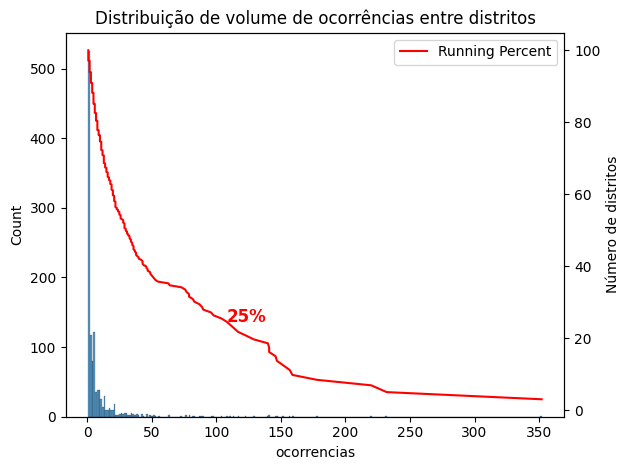

In [10]:
#Visualizando o resultado da tabela anterior, consolidada por meio de um gráfico combinado de histograma, com a linha de valor acumulado.
#O roluto destaca os valores a partir de 100 ocorrências, que correspondem a apenas 25% dos dados disponíveis.

# Histograma do número de ocorrências
sns.histplot(x=df['ocorrencias'])

#Eixo secuncário
ax2 = plt.twinx()
ax2.plot(df['ocorrencias'], df['running_percent'], color='red', label='Running Percent')
#Rótulo
idx_25 = (df['running_percent'] - 25).abs().idxmin()
ax2.text(
    df.loc[idx_25, 'ocorrencias'],
    df.loc[idx_25, 'running_percent'],
    '25%',
    color='red',
    fontsize=12,
    fontweight='bold'
)

plt.title("Distribuição de volume de ocorrências entre distritos")
plt.xlabel("Número de ocorrências")
plt.ylabel("Número de distritos")
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend()
plt.show()

### Conclusão

A coluna district tem uma distribuição muito diversa de valores. Em um cenário real de aplicação do modelo, onde tivéssemos um volume considerável de dados para cada valor, seria possível utiliza esse valor como um input do modelo. No entanto, a presença escarça de ocorrências para muitos valores no cenário atual podem impactar a precisão do modelo.

Dado isso, para fins de simplificação, vamos excluir essa coluna da análise, e considerar o modelo de maneira geral a partir dos demais inputs.

Observação:
- Uma alternativa mais adequada para a geração de um modelo com maior precisão seria a a classificação/agrupamento dos bairros em zonas, de forma a simplificar os valores e reduzi-los a 5 zonas específicas, que poderiam simplificar a classificação e, possivelmente, reproduzir um pouco melhor o impacto que a localização tem nos valores de aluguel.
**- No entanto, as fontes oficiais disponíveis não possuem uma classificação adequada para os valores disponíveis. Nas tentativas relizadas, mais de 90% dos valores seguia sem uma classificação, então optamos por descartar o tratamento.**


## Coluna Type
Como os valores se comportam em relação ao tipo do imóvel?

In [11]:
frequencia_relativa = data['type'].value_counts(normalize=True)
frequencia_relativa

,proportion
type,
Apartamento,0.617140
Casa,0.243716
Studio e kitnet,0.118470
Casa em condomínio,0.020674


* Observando a frequência relativa dos valore a partir da coluna Type, vemos que a maior concentração de ocorrências é do tipo apartamento (62,7%), enquanto apenas 2% são casas em condomínio.

In [12]:
#Resumindo os valores numéricos com base no tipo de imóvel para avaliar o comportamento do dataset
colunas_numericas = data.select_dtypes(include=['int64', 'float64']).columns
resumo_type = data.groupby('type')[colunas_numericas].agg(['min', 'max', 'mean', 'std'])
resumo_type.loc[:, (slice(None), ['mean', 'std'])] = resumo_type.loc[:, (slice(None), ['mean', 'std'])].round(1)
resumo_type

area                    bedrooms               garage      \
                    min  max   mean    std      min max mean  std    min max   
type                                                                           
Apartamento           0  568   73.3   50.9        0   6  2.0  0.8      0   6   
Casa                  0  580  136.1  101.8        0   6  2.4  1.1      0   6   
Casa em condomínio    1  560  119.4  113.2        1   6  2.2  1.1      0   6   
Studio e kitnet       1  130   31.7   10.1        0   6  1.0  0.2      0   3   

                             rent                        total                 \
                   mean  std  min    max    mean     std   min    max    mean   
type                                                                            
Apartamento         1.0  0.9  567  15000  3356.9  2639.0   686  28700  4435.4   
Casa                1.5  1.6  500  15000  3471.9  2873.8   509  21050  3824.2   
Casa em condomínio  1.4  1.4  504  15000  3912.6  3930.9   556  21140  4576.2   
Studio e kitnet     0.3  0.5  500  25000  2127.8  1365.7   588  26710  2668.3   

                            
                       std  
type                        
Apartamento         3496.0  
Casa                3259.1  
Casa em condomínio  4733.8  
Studio e kitnet     1624.1

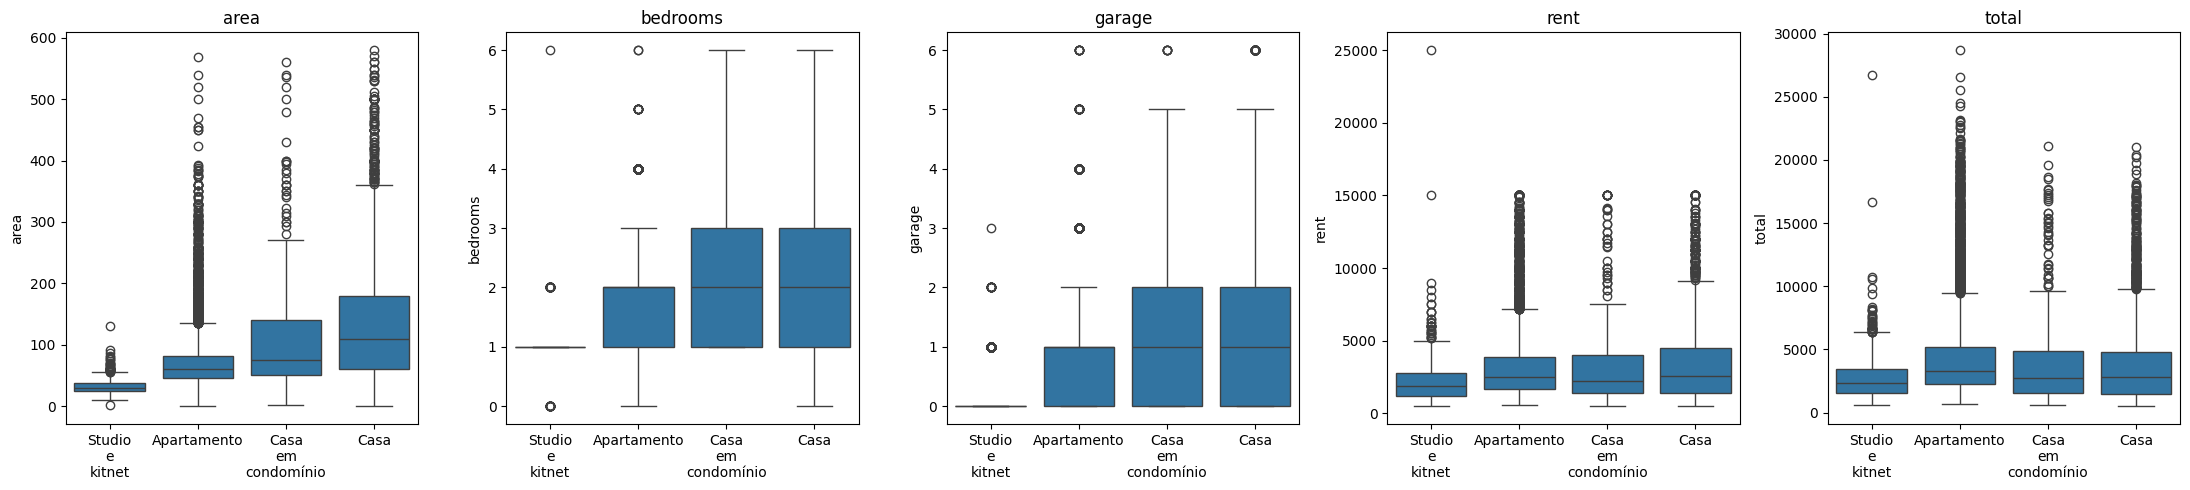

In [13]:
# Seleciona as colunas numéricas do seu dataframe
colunas_numericas = ['area', 'bedrooms', 'garage', 'rent', 'total']

plt.figure(figsize=(22, 5))
tipos = data['type'].unique()
labels_duas_linhas = [label.replace(' ', '\n') for label in tipos]


for i, coluna in enumerate(colunas_numericas):
    plt.subplot(1, 5, i + 1)
    sns.boxplot(x='type', y=coluna, data=data)
    plt.title(coluna)
    plt.xlabel('')
    plt.ylabel(coluna)
    plt.xticks(ticks=range(len(tipos)), labels=labels_duas_linhas)


plt.tight_layout()
plt.show()

- As duas modalidades de casa possume a maior média de Área do imóvel, também com o maior desvio padrão, apontando para uma maior dispersão dos dados.
- Avaliando o número de quartos disponíveis, achama atenção o valor máximo de 6 quartos no tipo "Studio e kitnet". Não deveriam haver estúdios com um número tão alto de dormitórios, apontando para possíveis inconsistências a serem removidas.
- Avaliando a coluna Rent, chama atenção o valor máximo de 25000, também para o tipo "Studio e kitnet", muido discremante do máximo de 15000 nas demais colunas.
- Considerando tanto as colunas Rent e Total, vemos casa em condomínio com as maiores médias e desvios padrões, o que apontam para um tipo de propriedade possívelmente mais cara e também com maior dispersão de valores.

# COLUNAS NUMÉRICAS
Antes de explorar cada coluna, vamos avaliar a corelção entre os indicadores presentes, para identificar possíveis relacionamentos a serem investigados.

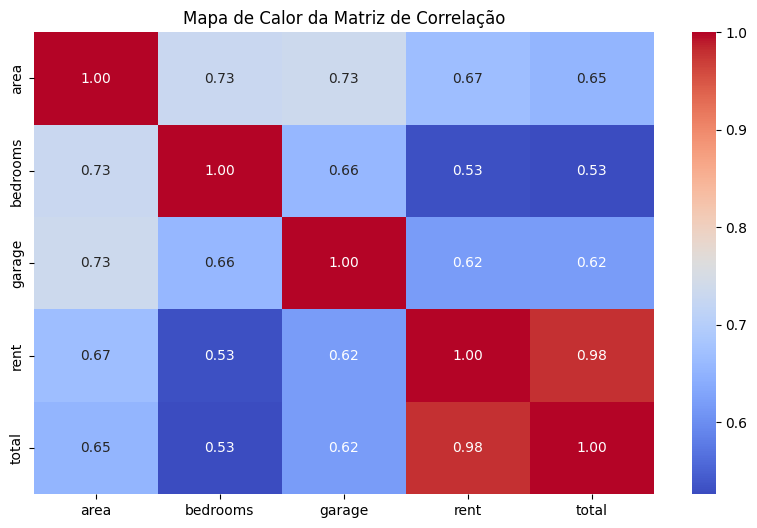

In [14]:
# Mapar de calor sobre matriz correlação das colunas
colunas_numericas = data.select_dtypes(include=['int64', 'float64']).columns
matriz_correlacao = data[colunas_numericas].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(matriz_correlacao, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Mapa de Calor da Matriz de Correlação')
plt.show()

- Observando a coluna Total, a maior correlação é com a coluna Rent, o que é esperado, uma vez que a maior parcela do valor total corresponde ao aluguel.
- Depois disso, Garage e Area seguem com as próximas maiores correlações. Vamos analisar isso mais a frente.

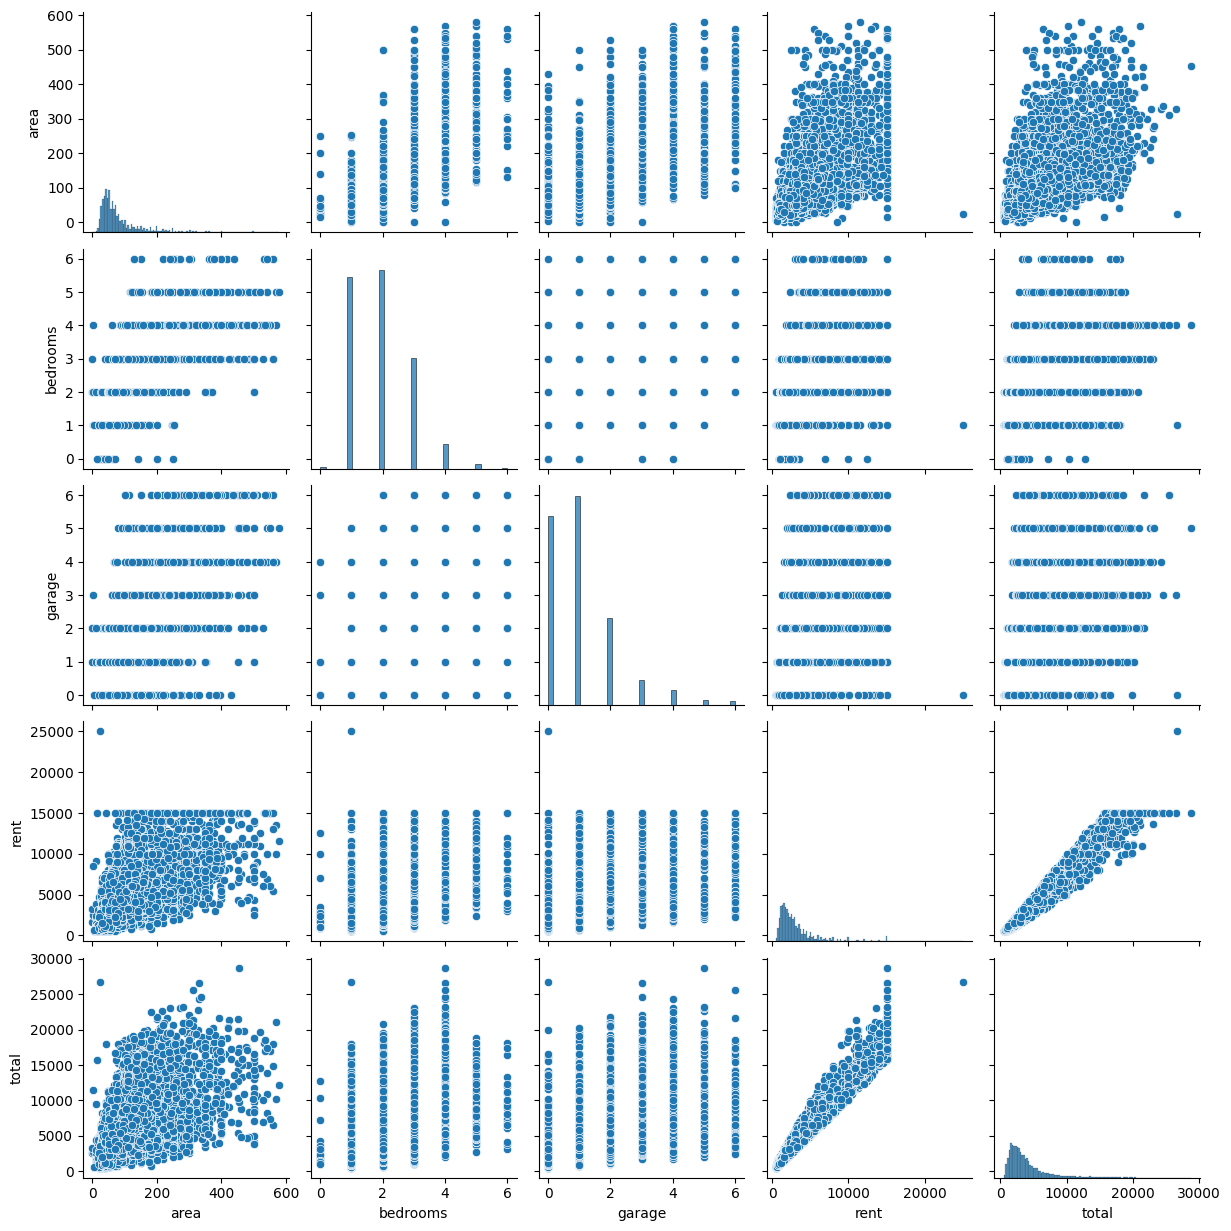

In [15]:
#Experimentando a impressão de pari plot para análise de todas as variáveis numéricas em conjunto.
sns.pairplot(data=data)
plt.show()


* Apesar da utilização dos pair plots ser uma técnica interessante para simplificar a avaliação de distribuição e relacionamento entre os dados, a característica do dataset escolhido torna essa visualização mais confusa. Sendo assim, vamos avaliar os principais relacionamentos em detalhe a seguir.

## Coluna Area
Como os valores se comportam em relação a área do imóvel?

Inicialmente, vamos remover os registros onde a área é 0.

In [16]:
check = data[data['area']== 0].copy()
check

,address,district,area,bedrooms,garage,type,rent,total
2983,Rua Relíquia,Jardim das Laranjeiras,0,2,1,Apartamento,1600,2569
7085,Rua Edmundo de Amicis,Morumbi,0,3,2,Casa,3200,3351


In [17]:
data = data[data['area'] != 0].copy()

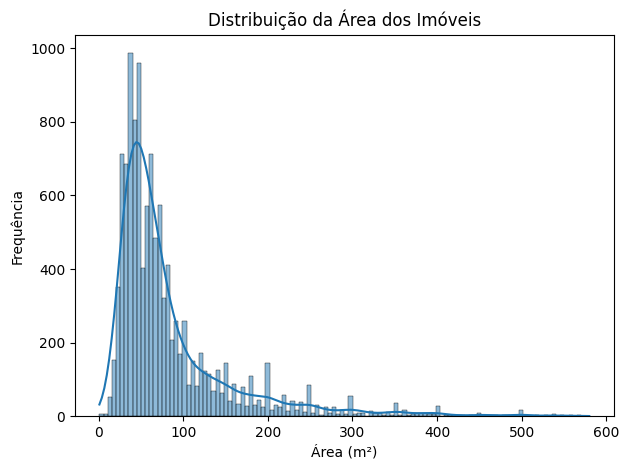

In [18]:
sns.histplot(data['area'], kde=True)
plt.title('Distribuição da Área dos Imóveis')
plt.xlabel('Área (m²)')
plt.ylabel('Frequência')
plt.tight_layout()
plt.show()

* Temos uma distribuição assimetrica à direita, com um grande volume de imóveis com área inferior a 100m2.


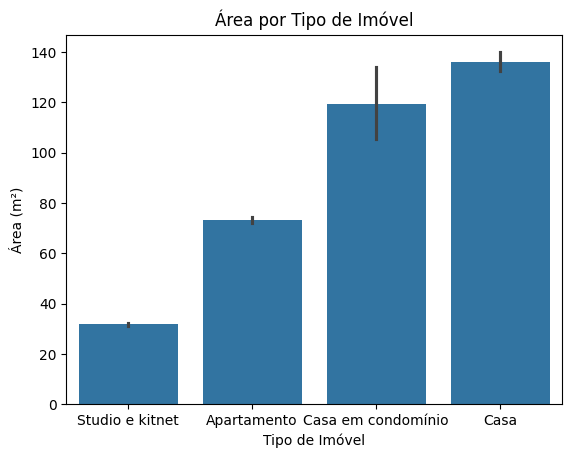

In [19]:
sns.barplot(x='type', y='area', data=data)
plt.title('Área por Tipo de Imóvel')
plt.xlabel('Tipo de Imóvel')
plt.ylabel('Área (m²)')
plt.show()

- Como já identificado anteriormente, a média de área das casas (foram ou dentro de condomínios) é maior.


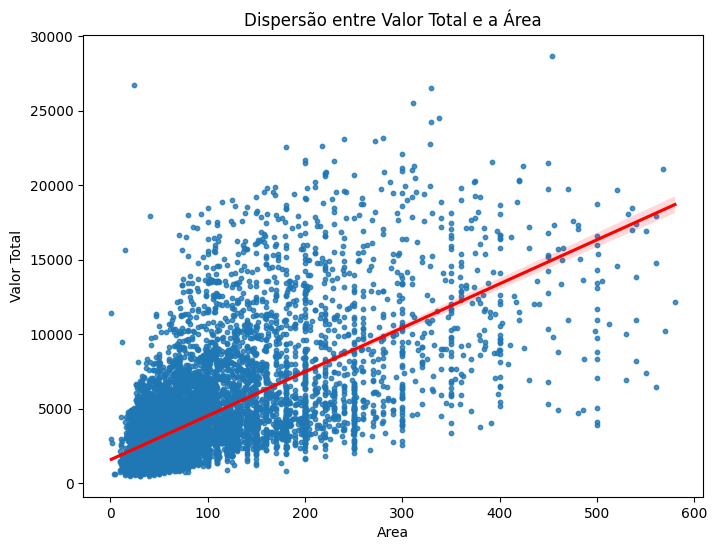

In [20]:
plt.figure(figsize=(8, 6))
sns.regplot(x='area', y='total', data=data, scatter_kws={'s': 10}, line_kws={'color': 'red'})
plt.xlabel('Area')
plt.ylabel('Valor Total')
plt.title('Dispersão entre Valor Total e a Área')
plt.show()

- A visualição da dispersão entre área e valor total confimar o ponto já identificado através da matriz de correlação.

## Coluna Bedrooms
Como os valores se comportam em relação ao número de dormitórios?

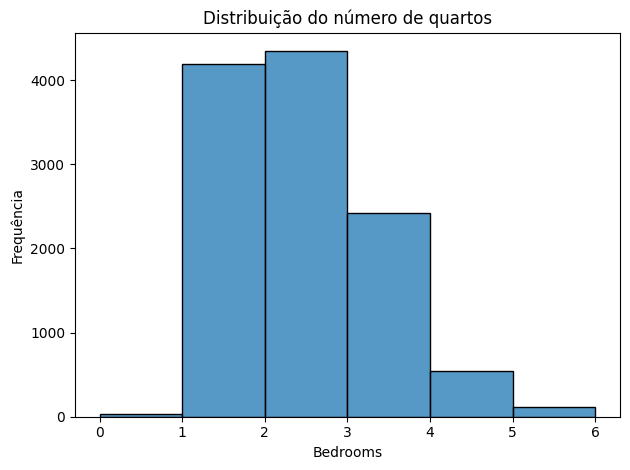

In [21]:
sns.histplot(data['bedrooms'], bins = 6)
plt.title('Distribuição do número de quartos')
plt.xlabel('Bedrooms')
plt.ylabel('Frequência')
plt.tight_layout()
plt.show()

- Distribuição dos valores segue uma distribuição próxima da normal, com leve assimetria a direita, posicionando a maior parte dos valores da amostra entre 1 e 3 quartos.

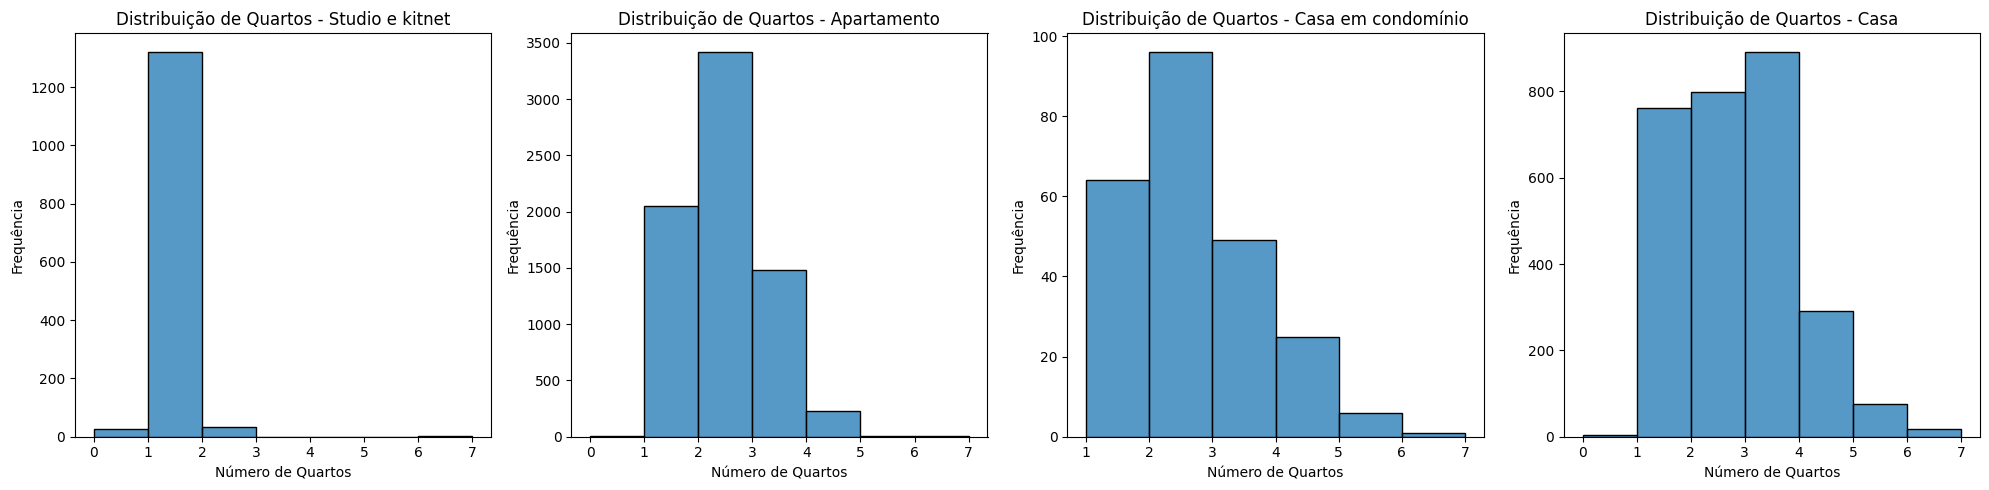

In [22]:
tipos = data['type'].unique()

plt.figure(figsize=(20, 5))

for i, tipo in enumerate(tipos):
    plt.subplot(1, 4, i + 1)
    subset = data[data['type'] == tipo]
    sns.histplot(subset['bedrooms'], bins=range(subset['bedrooms'].min(), subset['bedrooms'].max() + 2), kde=False)
    plt.title(f'Distribuição de Quartos - {tipo}')
    plt.xlabel('Número de Quartos')
    plt.ylabel('Frequência')

plt.tight_layout()
plt.show()

* Quando observamos essa distribuição pela ótica do tipo de imóvel, perecemos as particularidades de cada tipo.

## Coluna Garage
Como os valores se comportam em relação ao número de vagas de garagem?


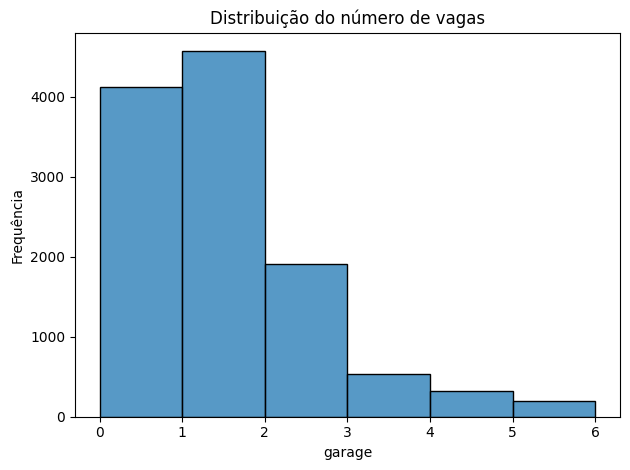

In [23]:
sns.histplot(data['garage'], bins = 6)
plt.title('Distribuição do número de vagas')
plt.xlabel('garage')
plt.ylabel('Frequência')
plt.tight_layout()
plt.show()

* Distribuição dos valores de vagas de garagem apresenta assimetria a direita, posicionando a maior parte dos valores da amostra entre 0 e 2 vagas.

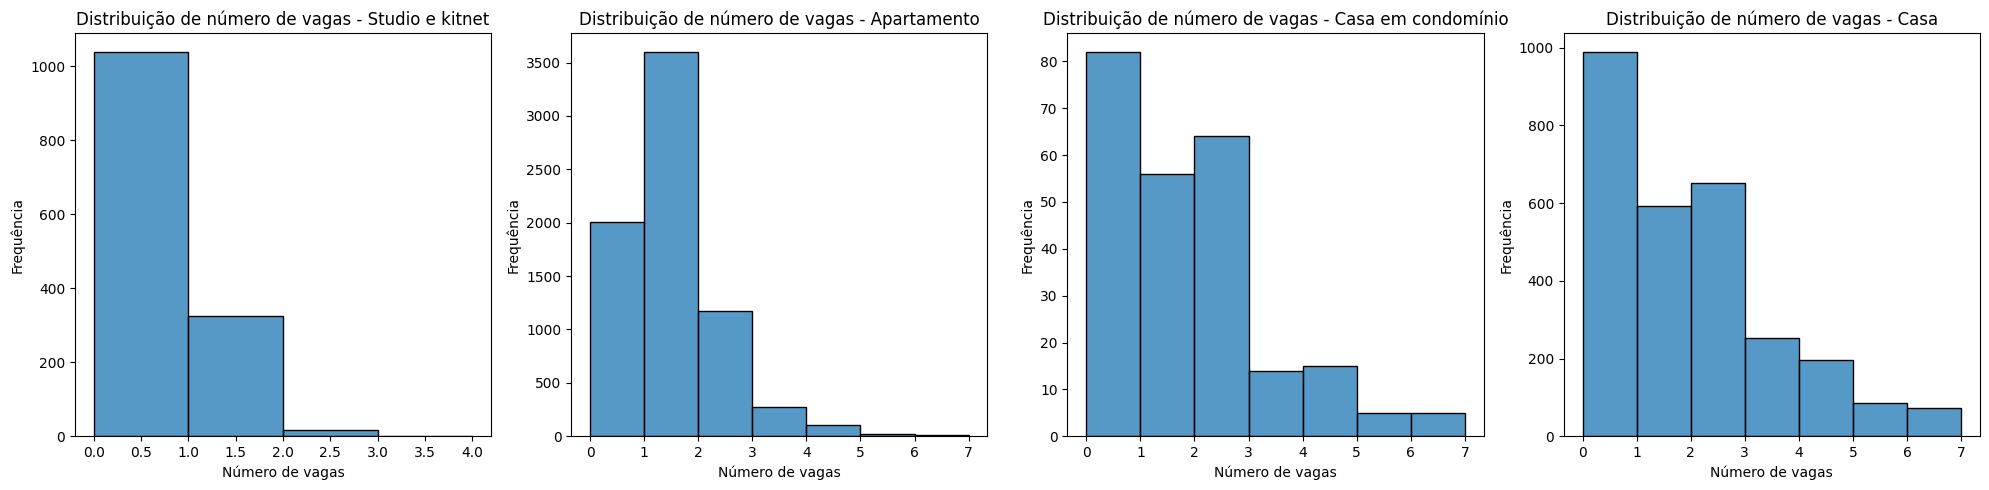

In [24]:
tipos = data['type'].unique()

plt.figure(figsize=(20, 5))

for i, tipo in enumerate(tipos):
    plt.subplot(1, 4, i + 1)
    subset = data[data['type'] == tipo]
    sns.histplot(subset['garage'], bins=range(subset['garage'].min(), subset['garage'].max() + 2), kde=False)
    plt.title(f'Distribuição de número de vagas - {tipo}')
    plt.xlabel('Número de vagas')
    plt.ylabel('Frequência')

plt.tight_layout()
plt.show()

- A característica de assimetria se mantém, mesmo quando exploramos a distribuição pela ótica dos diferentes tipos de imóvel.


## Coluna Rent
Vamos entender como os valores se comportam em relação ao valor do aluguel. No entanto, focaremos os os estudos principais nas coluna total, que seria o objetivo da previsão do nosso modelo.



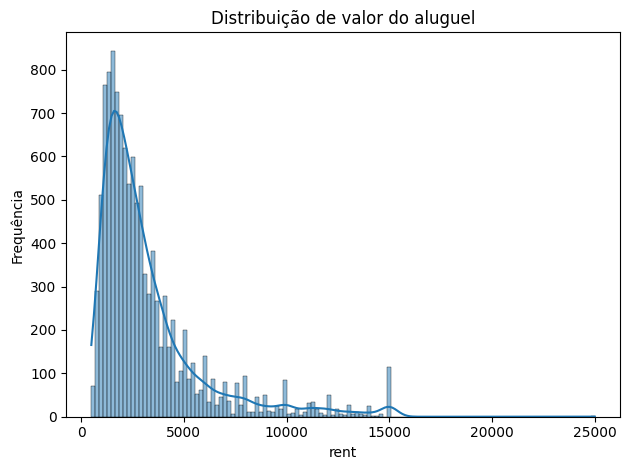

In [25]:
sns.histplot(data['rent'] , kde=True)
plt.title('Distribuição de valor do aluguel')
plt.xlabel('rent')
plt.ylabel('Frequência')
plt.tight_layout()
plt.show()

- A distribuição dos valores é altamente simátrica para a direita, concentrando um alto volume de imóveis na faixa inferior a 5 mil reais.


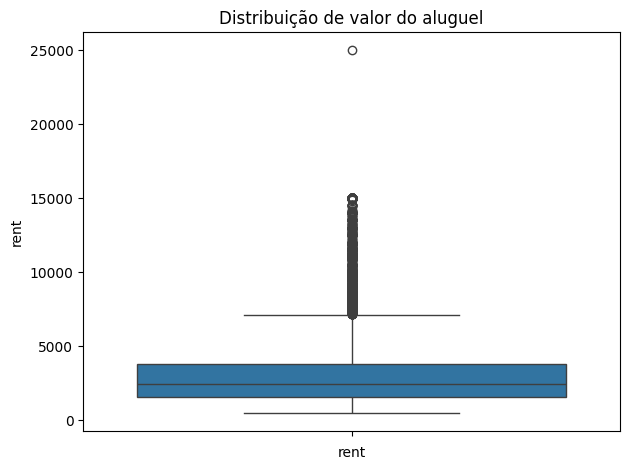

In [26]:
sns.boxplot( y = "rent", data = data)
plt.title('Distribuição de valor do aluguel')
plt.xlabel('rent')
#plt.ylabel('Frequência')
plt.tight_layout()
plt.show()

- O ponto anterior é confirmado com a utilização do box plot, que posiciona o terceiro quartil próximo a faixa de 5000 reais, e aponta um grande número de posíveis outliers acima dos bigodes do gráfico.

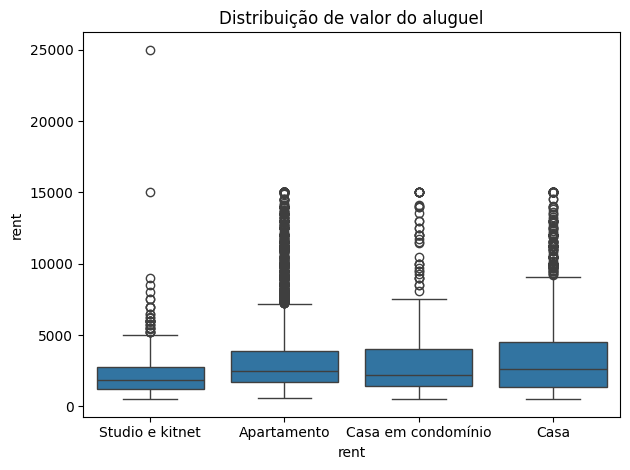

In [27]:
sns.boxplot( y = "rent", x = "type", data = data)
plt.title('Distribuição de valor do aluguel')
plt.xlabel('rent')
#plt.ylabel('Frequência')
plt.tight_layout()
plt.show()

- Ao visualizar os mesmos boxplots a partir da quebra de tipo do imóvel, vemos a presença de muitos valores acima dos limites em cada um dos tipos. No entanto, chama atenção os dois valores com altíssima discrepância no tipo Studio e Kitnet.

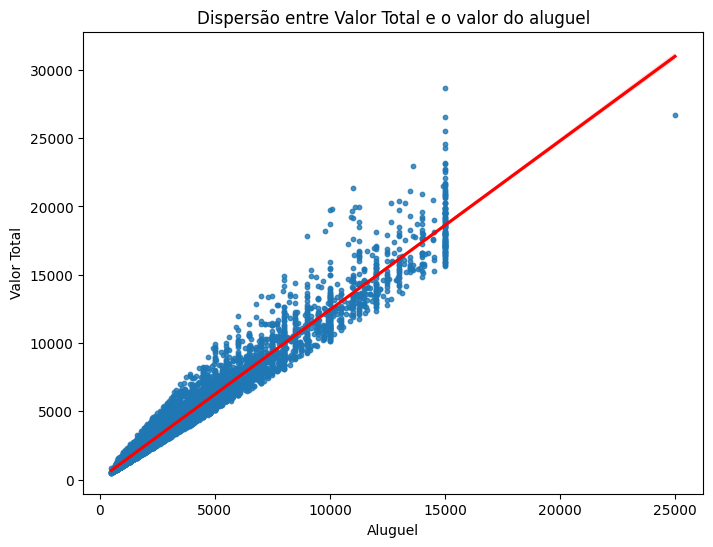

In [28]:
plt.figure(figsize=(8, 6))
sns.regplot(x='rent', y='total', data=data, scatter_kws={'s': 10}, line_kws={'color': 'red'})
plt.xlabel('Aluguel')
plt.ylabel('Valor Total')
plt.title('Dispersão entre Valor Total e o valor do aluguel')
plt.show()

- Como esperado, e já apontado na visualização de matriz de correlação, Valor total e aluguel são altamente correlacionadas, uma vez que o aluguel é normalmente a maior parcela do valor total do imóvel.

## Coluna Total
Como os valores se comportam em relação ao valor total?

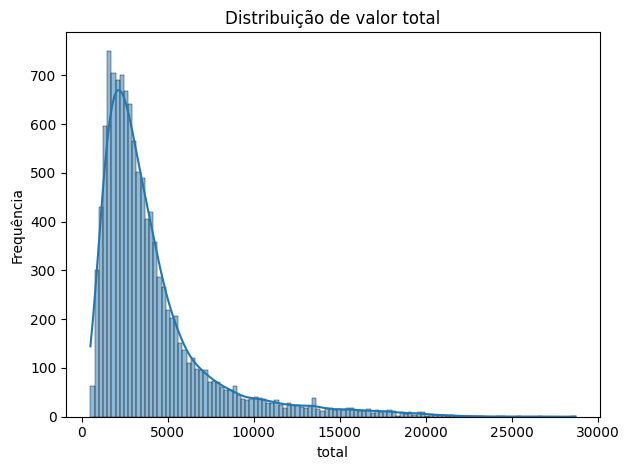

In [29]:
sns.histplot(data['total'] , kde=True)
plt.title('Distribuição de valor total')
plt.xlabel('total')
plt.ylabel('Frequência')
plt.tight_layout()
plt.show()

* De forma semelhante ao valor do aluguel, temos no valor total uma curva altamente asimétrica a direita, com boa parte dos valores abaixo dos 5 mil reais.

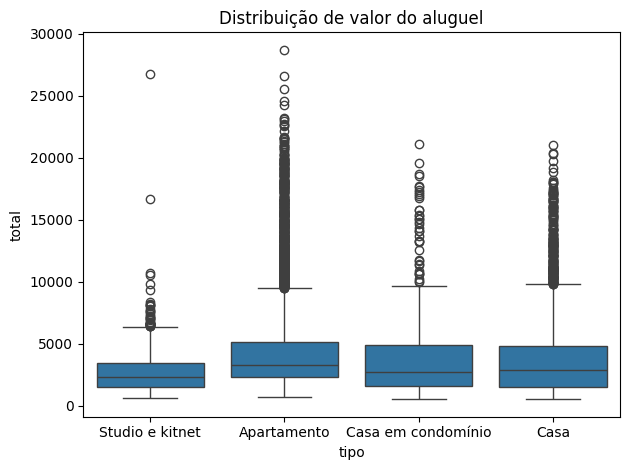

In [30]:
sns.boxplot( y = "total", x = "type", data = data)
plt.title('Distribuição de valor do aluguel')
plt.xlabel('tipo')
plt.ylabel('total')
plt.tight_layout()
plt.show()

- Na visão de box plot aberta por tipo, temos novamente um destaque para dois outliers muito distintos no tipo Studio e kitnet.

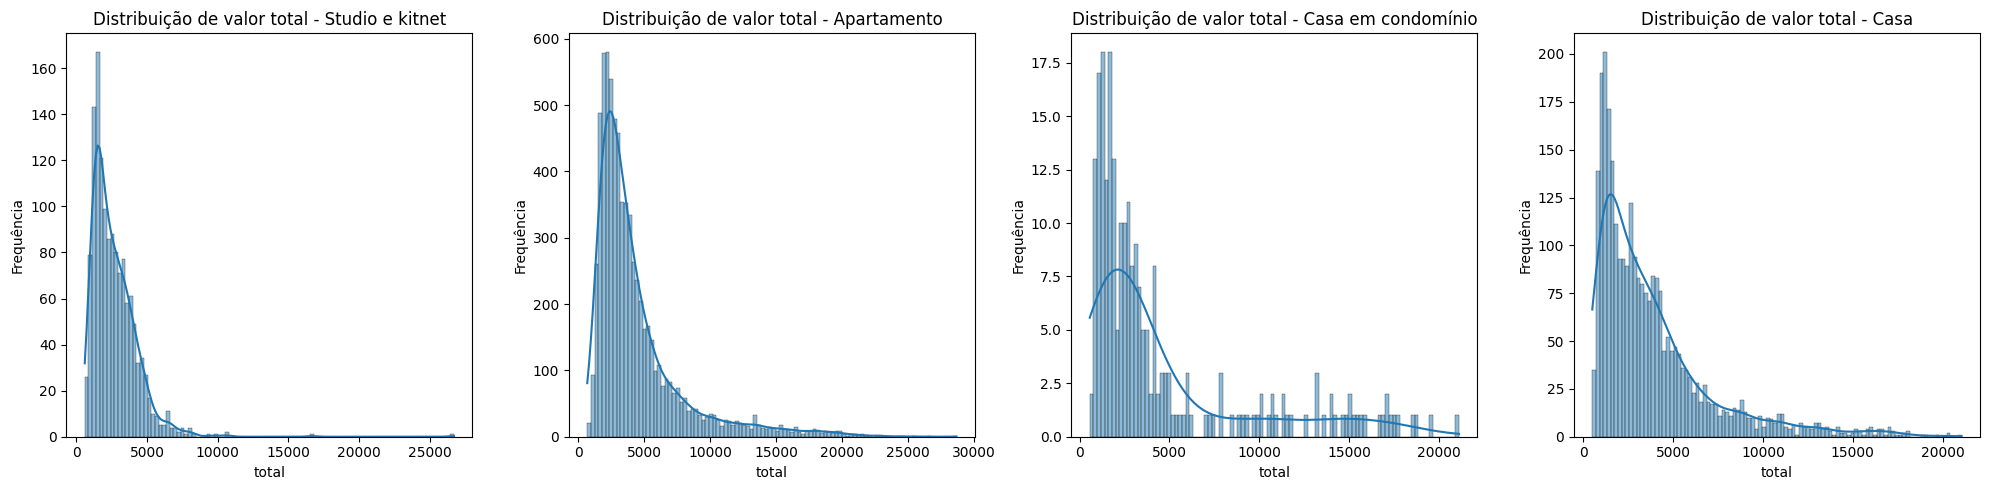

In [31]:
tipos = data['type'].unique()

plt.figure(figsize=(20, 5))

for i, tipo in enumerate(tipos):
    plt.subplot(1, 4, i + 1)
    subset = data[data['type'] == tipo]
    sns.histplot(subset['total'], bins=100, kde=True)
    plt.title(f'Distribuição de valor total - {tipo}')
    plt.xlabel('total')
    plt.ylabel('Frequência')

plt.tight_layout()
plt.show()

- Observando os diferentes histogramas do valor total por tipo de imóvel, temos curvas relativamente semelhantes. No entanto, chama atenção a curva do tipo Saca em condomínio, com uma maior presença relativa de ocorrências distribuídas na calda longa, acima de 5 mil reais.
- Ainda que esse sessa o  tipo com menor presença no dataset, aponta para uma maior presença de imóveis de alto valor total de aluguel para essa tipologia.


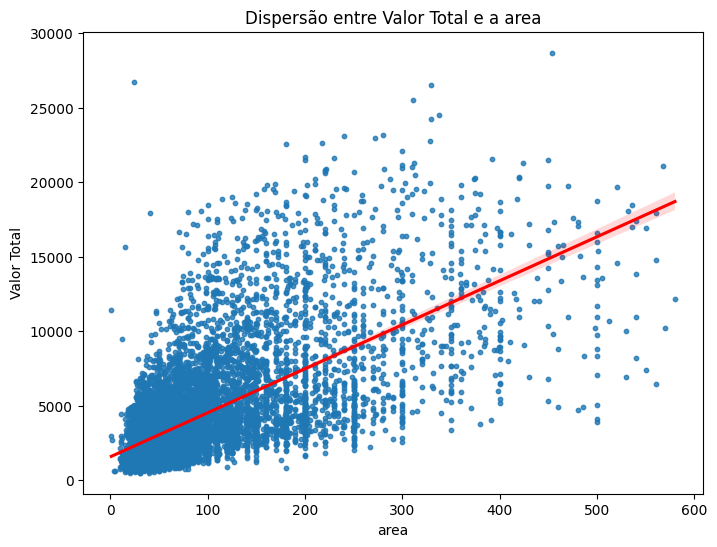

In [32]:
plt.figure(figsize=(8, 6))
sns.regplot(x='area', y='total', data=data, scatter_kws={'s': 10}, line_kws={'color': 'red'})
plt.xlabel('area')
plt.ylabel('Valor Total')
plt.title('Dispersão entre Valor Total e a area')
plt.show()

- Como já detectado anteriormente, área e e valor total apontam para uma alta correlação.

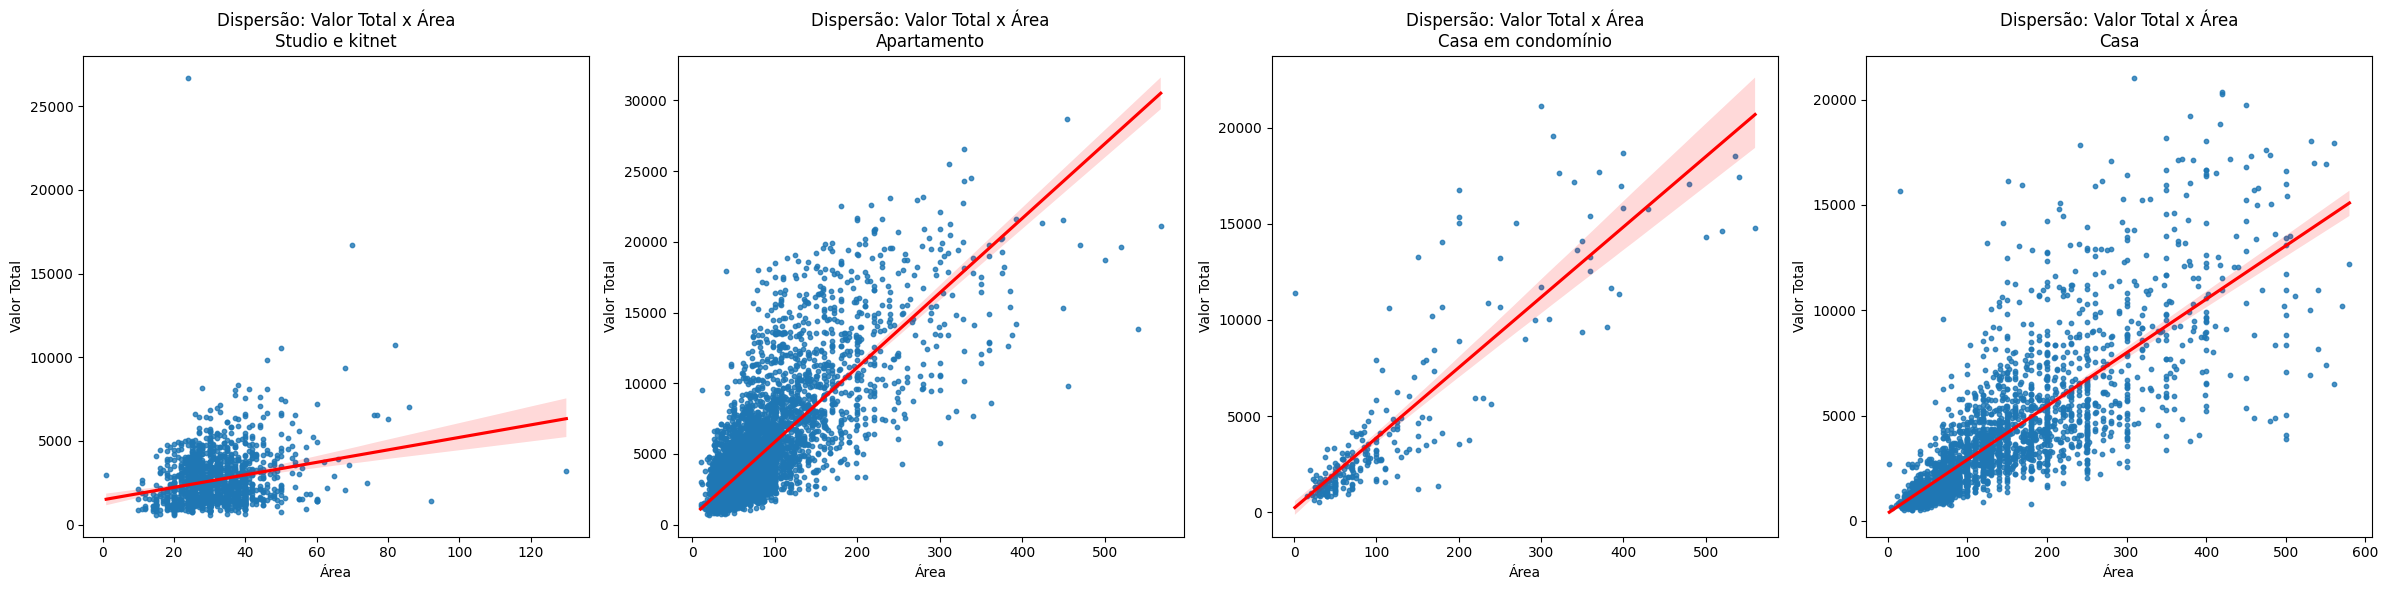

In [33]:
# Obter os valores únicos da coluna 'type'
tipos = data['type'].unique()

plt.figure(figsize=(24, 6))  # Largura maior para 4 gráficos lado a lado

for i, tipo in enumerate(tipos):
    plt.subplot(1, 4, i + 1)
    subset = data[data['type'] == tipo]
    sns.regplot(x='area', y='total', data=subset, scatter_kws={'s': 10}, line_kws={'color': 'red'})
    plt.xlabel('Área')
    plt.ylabel('Valor Total')
    plt.title(f'Dispersão: Valor Total x Área\n{tipo}')

plt.tight_layout()
plt.show()

- No entanto, esse relacionamento pode ser melhor observado quando quebrados pelo tipo do imóvel, como nos gráficos acima.

In [34]:
# Média geral do preço do metro quadrado
media_m2_geral = (data['total'] / data['area']).mean()
print(f'Média geral do preço do metro quadrado: {media_m2_geral:.2f}')

Média geral do preço do metro quadrado: 58.59


In [35]:
media_m2_por_tipo = (data['total'] / data['area']).groupby(data['type']).mean()
print('Média do preço do metro quadrado por tipo de imóvel:')
media_m2_por_tipo.round(2)

Média do preço do metro quadrado por tipo de imóvel:


,0
type,
Apartamento,62.78
Casa,30.19
Casa em condomínio,85.16
Studio e kitnet,90.52


- Ao observar o valor médio do metro quadrado, chama atenção o custo para Studio e kitnet. Vamos observar mais de perto.

In [36]:
filtro = data['type'].isin(['Studio e kitnet'])
top20 = data[filtro].sort_values(by='total', ascending=False).head(20)

top20

,address,district,area,bedrooms,garage,type,rent,total
6095,Avenida Chibarás,Planalto Paulista,24,1,0,Studio e kitnet,25000,26710
10386,Rua Senador César Lacerda Vergueiro,Sumarezinho,70,1,1,Studio e kitnet,15000,16680
848,Alameda Tietê,Cerqueira César,82,1,2,Studio e kitnet,8500,10720
9460,Rua Padre Lebret,Jardim Leonor,50,1,1,Studio e kitnet,9000,10550
5679,Rua Fiandeiras,Vila Olímpia,46,1,2,Studio e kitnet,7500,9834
11283,Rua da Consolação,Cerqueira César,68,1,1,Studio e kitnet,8000,9355
8205,Alameda Jaú,Jardim Paulista,38,1,0,Studio e kitnet,7500,8325
5663,Rua Pedroso Alvarenga,Itaim Bibi,28,1,1,Studio e kitnet,7000,8160
8667,Avenida Washington Luís,Santo Amaro,41,1,1,Studio e kitnet,7000,8129
8017,Avenida Eusébio Matoso,Pinheiros,46,1,1,Studio e kitnet,6010,8101


Os dois primeiros valores são muito discrepantes, e correspondem aos outlieres anteriormente detectados. Vamos remove-los e avalioar o resultado.

In [37]:
mascara_remover = (data['type'].isin(['Studio e kitnet'])) & (data['total'] > 12000)
data = data[~mascara_remover].copy()

In [38]:
filtro = data['type'].isin(['Studio e kitnet'])
top5 = data[filtro].sort_values(by='total', ascending=False).head(5)
top5

,address,district,area,bedrooms,garage,type,rent,total
848,Alameda Tietê,Cerqueira César,82,1,2,Studio e kitnet,8500,10720
9460,Rua Padre Lebret,Jardim Leonor,50,1,1,Studio e kitnet,9000,10550
5679,Rua Fiandeiras,Vila Olímpia,46,1,2,Studio e kitnet,7500,9834
11283,Rua da Consolação,Cerqueira César,68,1,1,Studio e kitnet,8000,9355
8205,Alameda Jaú,Jardim Paulista,38,1,0,Studio e kitnet,7500,8325


In [39]:
# Média geral do preço do metro quadrado
media_m2_geral = (data['total'] / data['area']).mean()
print(f'Média geral do preço do metro quadrado: {media_m2_geral:.2f}')

Média geral do preço do metro quadrado: 58.48


In [40]:
media_m2_por_tipo = (data['total'] / data['area']).groupby(data['type']).mean()
print('Média do preço do metro quadrado por tipo de imóvel:')
media_m2_por_tipo.round(2)

Média do preço do metro quadrado por tipo de imóvel:


,0
type,
Apartamento,62.78
Casa,30.19
Casa em condomínio,85.16
Studio e kitnet,89.67


Repetindo a análise após a remoção, observamos que o preço do m2 segue sendo mais alto em Studios e kitnets, porém agora menos discrepante.

# CONCLUSÕES


Em relação as hipóteses levantadas inicialmente:

1)  O número de cômodos e tamanho total das propriedades tem correlação  com o valor total do aluguel.

- Tanto número de quartos como área possuem correlação com o valor total do aluguel, no entanto a área total possui um correlação mais forte.

2) O tipo do imóvel tem grande influência no preço do aluguel, mesmo quando considerados imóveis com as mesmas características.

- Sim, Casa em condomínio e Kit net tendem a ser mais caras do que as demais tipologias.

3) O preço por m2 é maior para casas do que para apartamentos.

- Verdade apenas para casas em condomínios. As casa convencionais possuem um m2 mais barato que em apartamentos.

Chama atenção alguns fatos que poderiam ser investigados mais a frente, em análises mais avançadas:

- Agregando dados sobre a localização, seja no nível distrito ou zona, seria possível analisar o impacto de bairros específicos no preço médio para cada tipologoia.
- Agregando informações sobre idade do imóvel e característica dos itens do condomínio poderiam ajudar a entender o impacto desses elementos no preço total do imóvel.

#PRÉ-PROCESSAMENTO

Para a preparação dos dados para o uso do no nosso modelo, executaremos as seguintes atividades:

- Separação em teste e treino
- Normalização
- Padronização
- One hot encoding da coluna Type



## Separação em treino e teste


In [41]:
data = data.drop(['district','address'], axis=1)

In [42]:
data.head()

,area,bedrooms,garage,type,rent,total
0,21,1,0,Studio e kitnet,2400,2939
1,15,1,1,Studio e kitnet,1030,1345
2,18,1,0,Apartamento,4000,4661
3,56,2,2,Casa em condomínio,1750,1954
4,19,1,0,Studio e kitnet,4000,4654


- Iniciamos com a remoção das colunas District e address, que não serão usada no modelo.

## Separação de treino e teste

In [43]:
# Separar features (X) e target (y)
X = data.drop('total', axis=1)
y = data['total']

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [45]:
print(f"Dimensões de X_train: {X_train.shape}")
print(f"Dimensões de X_test: {X_test.shape}")
print(f"Dimensões de y_train: {y_train.shape}")
print(f"Dimensões de y_test: {y_test.shape}")

Dimensões de X_train: (9322, 5)
Dimensões de X_test: (2331, 5)
Dimensões de y_train: (9322,)
Dimensões de y_test: (2331,)


# One hot encoding
- Vamos codificar a coluna "type", para permitir o uso no modelo.

In [46]:
ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
ohe.fit(X_train[['type']])

X_train_encoded = ohe.transform(X_train[['type']])
X_test_encoded = ohe.transform(X_test[['type']])

In [47]:
X_train_numerico = X_train.drop(columns=['type'])
X_test_numerico = X_test.drop(columns=['type'])

X_train_final = np.concatenate([X_train_numerico.values, X_train_encoded], axis=1)
X_test_final = np.concatenate([X_test_numerico.values, X_test_encoded], axis=1)

In [48]:
# Obtém os nomes das colunas criadas pelo OneHotEncoder
colunas_ohe = ohe.get_feature_names_out(['type'])

# Cria DataFrames para os codificados
X_train_encoded_df = pd.DataFrame(X_train_encoded, columns=colunas_ohe, index=X_train.index)
X_test_encoded_df = pd.DataFrame(X_test_encoded, columns=colunas_ohe, index=X_test.index)

# Junta os DataFrames numéricos e codificados
X_train_final = pd.concat([X_train_numerico, X_train_encoded_df], axis=1)
X_test_final = pd.concat([X_test_numerico, X_test_encoded_df], axis=1)

##Padronização

In [49]:
# Identifique as colunas numéricas
colunas_numericas = X_train_numerico.columns

# Inicialize o scaler e ajuste apenas no treino
scaler = StandardScaler()
scaler.fit(X_train_numerico)

# Transforme treino e teste
X_train_numerico_pad = scaler.transform(X_train_numerico)
X_test_numerico_pad = scaler.transform(X_test_numerico)

# Converta para DataFrame para facilitar a concatenação
X_train_numerico_pad = pd.DataFrame(X_train_numerico_pad, columns=colunas_numericas, index=X_train.index)
X_test_numerico_pad = pd.DataFrame(X_test_numerico_pad, columns=colunas_numericas, index=X_test.index)

# Concatene com as colunas one-hot
X_train_padronizado = pd.concat([X_train_numerico_pad, X_train_encoded_df], axis=1)
X_test_padronizado = pd.concat([X_test_numerico_pad, X_test_encoded_df], axis=1)

##Normalização

In [50]:
# Inicialize o scaler e ajuste apenas no treino
scaler = MinMaxScaler()
scaler.fit(X_train_numerico)

# Transforme treino e teste
X_train_numerico_norm = scaler.transform(X_train_numerico)
X_test_numerico_norm = scaler.transform(X_test_numerico)

# Converta para DataFrame para facilitar a concatenação
X_train_numerico_norm = pd.DataFrame(X_train_numerico_norm, columns=colunas_numericas, index=X_train.index)
X_test_numerico_norm = pd.DataFrame(X_test_numerico_norm, columns=colunas_numericas, index=X_test.index)

# Concatene com as colunas one-hot
X_train_normalizado = pd.concat([X_train_numerico_norm, X_train_encoded_df], axis=1)
X_test_normalizado = pd.concat([X_test_numerico_norm, X_test_encoded_df], axis=1)

#Teste do modelo
Etapa não obrigatória para tarefa, feita apenas para testar o modelo proposto.

Mean Squared Error (MSE): 313238.31
R² Score: 0.97


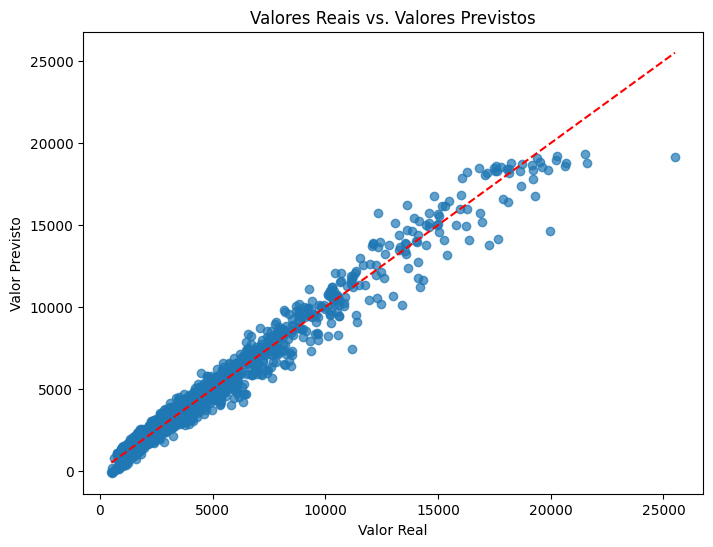

In [51]:
# 1. Instanciamento e treino do modelo
model = LinearRegression()
model.fit(X_train_padronizado, y_train)  # ou X_train_normalizado

# 2. Faça previsões no conjunto de teste
y_pred = model.predict(X_test_padronizado)  # ou X_test_normalizado

# 3. Avalie o modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'R² Score: {r2:.2f}')

#4. Visualização
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel('Valor Real')
plt.ylabel('Valor Previsto')
plt.title('Valores Reais vs. Valores Previstos')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()
